# Data Visualisation

**Coming soon! (watch this space)**

In [14]:
options(repr.plot.width=4, repr.plot.height=4)

In [15]:
library(ggplot2)
library(dplyr)
library(tidyr)

## Bonus: Xmas Trees

In the meantime, here is a computationally reproducible festive meme...

In [16]:
options(repr.plot.width=6, repr.plot.height=2.5)

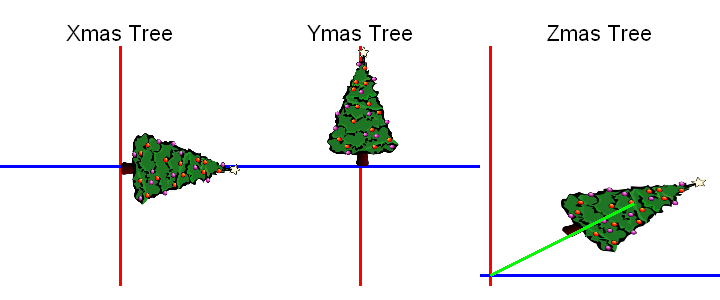

In [17]:
# for plotting
library(ggplot2)
library(patchwork)

# for working with png images and adding them to ggplot objects
library(grid)
library(magick)

# download an image as a temporary file
tree_url <- "https://upload.wikimedia.org/wikipedia/commons/4/42/TheresaKnott_christmas_tree.png"
tree <- tempfile(fileext = ".png")
download.file(tree_url, tree, mode="wb")

# read image into R
tree_img <- image_read(tree)

# get grobs for each plot
tree_grob_y <- rasterGrob(tree_img, interpolate=TRUE)

tree_grob_x <- tree_img |>
  image_rotate(90) |>
  rasterGrob(interpolate=TRUE)

tree_grob_z <- tree_img |>
  image_rotate(60) |>
  image_scale(geometry = geometry_size_percent(width=90, height=60)) |>
  rasterGrob(interpolate=TRUE)

# create canvas
canvas <- ggplot() +
  scale_x_continuous(limits=c(0, 1)) +
  scale_y_continuous(limits=c(0, 1))

# XMAS
xmas <- canvas +
  geom_vline(xintercept = 0.5, linewidth=1, colour="red") +
  geom_hline(yintercept = 0.5, linewidth=1, colour="blue") +
  annotation_custom(tree_grob_x, xmin=0.5, xmax=Inf, ymin=-Inf, ymax=Inf) +
  labs(title="Xmas Tree")

# YMAS
ymas <- canvas +
  geom_vline(xintercept = 0.5, linewidth=1, colour="red") +
  geom_hline(yintercept = 0.5, linewidth=1, colour="blue") +
  annotation_custom(tree_grob_y, xmin=-Inf, xmax=Inf, ymin=0.5, ymax=Inf) +
  labs(title="Ymas Tree")

# ZMAS
zmas <- canvas +
  annotation_custom(tree_grob_z, xmin=0.2, xmax=1.1, ymin=-0.45, ymax=1.1) +
  geom_vline(xintercept = 0, linewidth=1, colour="red") +
  geom_hline(yintercept = 0, linewidth=1, colour="blue") +
  annotate("segment", x=0, xend=0.66, y=0, yend=0.33, linewidth=1, colour="green") +
  labs(title="Zmas Tree")

# show result in one figure
(xmas | ymas | zmas) &
  theme_void() &
  theme(plot.title = element_text(hjust=0.5)) &
  coord_equal()